<a href="https://colab.research.google.com/github/alenzhasulan/dl-nlp/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D0%BE%D0%B2_TF_IDF_%26_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Классификация текстов - TFIDF и LogReg

In [ ]:
import random
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
 
 
import matplotlib.pyplot as plt
%matplotlib inline

**Загрузка и просмотр данных**

In [ ]:
df = pd.read_excel('reviews.xlsx',header=0,converters={'review_subtitle':str,'review_text':str}, na_filter=False)
df.head()

,target,movie_link,author_id,author_name,review_subtitle,review_text
0,good,/film/178563/,/user/311869/,sochi2014,,Настоящее кино. Наше кино. Прекрасная работа с...
1,good,/film/178563/,/user/1591566/,Альберт Попов,Предтеча многого,"Мало того, что сериал «Империя под ударом» (12..."
2,good,/film/178563/,/user/331395/,LennoxL,Срез жизни общества начала 20 го века,Период от реформ Александра Освободителя до пе...
3,good,/film/178563/,/user/4379604/,Ana_K,"Пусть мир погибнет, но восторжествует правосудие",Атмосферный сериал о Российской Империи начала...
4,neutral,/film/178563/,/user/178788/,Skept,Террор  Зло с непредсказуемыми последствиями,Самая большая беда современного общества это т...


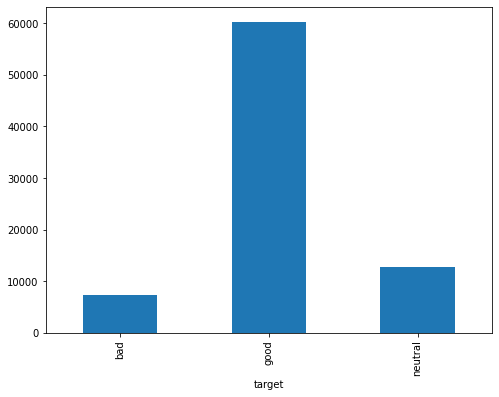

In [ ]:
fig = plt.figure(figsize=(8,6))
df.groupby('target').target.count().plot.bar(ylim=0)
plt.show()

**Предобработка текстов**

In [ ]:
df['review']=df['review_subtitle']+' '+df['review_text'] # обьеднием две столбцы в один столбец
df['target'] = df['target'].factorize()[0] # заменяем метку в цифру {good:0, neutral:1, bad:2 }

print(df['review'][0])
print()
print('Метка :', df['target'][0])

 Настоящее кино. Наше кино. Прекрасная работа сценариста, режиссёра, операторов. Профессиональный монтаж, музыкальное сопровождение. Превосходная игра актёров.

Работа с таким тонким материалом, как история, требует мастерства и подлинного таланта. Это не фантазия и нахлынувшее воображение, а факты, подлинная история, с которой нельзя не считаться. Прочувственно то неспокойное время. Фильм не отвергает прошлое, как делают в некоторых картин, не старается выкрасить в чёрные цвета действующих лиц. 

Фильм всего лишь повествует о людях, об идеях, о любви. Повествует о стране, которая очень сильно изменилась, но по-прежнему существует. Хочется вериться, что никакие идеи и люди, которые борются за эти идеи, не пойдут по проторённой дороге. Уроки должны быть выучены, особенно уроки истории.

Метка : 0


**Разделение данных на Train и Test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['target'], test_size=0.2, shuffle=True, random_state=1)
print("Обучающая выборка:", len(x_train))
print("Тестовая выборка:", len(x_test))

Обучающая выборка: 64227
Тестовая выборка: 16057


**Обучение**

In [ ]:
# Для векторного представление текстов используем tf-idf
# Классификации. После нескольких экпериментов самый лучший показатель: LogReg и LinearSVC

MAX_DF = 0.8 
MIN_DF = 5
class_weight={0:1,1:6,2:8.5}

sklearn_pipeline = Pipeline((('vect', TfidfVectorizer(max_df=MAX_DF,min_df=MIN_DF,norm='l2',ngram_range=(1, 2))),
                             ('cls', LogisticRegression(solver='lbfgs',max_iter=10000,class_weight=class_weight) )))

sklearn_pipeline.fit(x_train, y_train);

## Оценка качества

**Обучающая выборка:**

In [ ]:
y_train_pred = sklearn_pipeline.predict(x_train)
print(metrics.classification_report(y_train, y_train_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.967     0.983     48140
           1      0.884     1.000     0.939     10235
           2      0.962     1.000     0.981      5852

    accuracy                          0.976     64227
   macro avg      0.949     0.989     0.968     64227
weighted avg      0.978     0.976     0.976     64227



**Тестовая выборка:**

In [ ]:
y_test_pred = sklearn_pipeline.predict(x_test)
print(metrics.classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           0      0.938     0.897     0.917     12049
           1      0.555     0.667     0.606      2579
           2      0.759     0.765     0.762      1429

    accuracy                          0.848     16057
   macro avg      0.751     0.776     0.762     16057
weighted avg      0.861     0.848     0.853     16057

